Вид уравнения: x = A * y + B
Коэффициенты:
Slope: A = 5.7304695304695275e-05 
Intercept: B = -5.7442557442502e-08


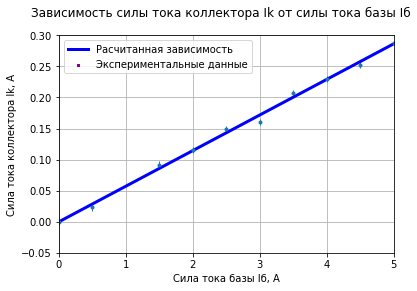

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

wookbook = openpyxl.load_workbook("mmm.xlsx")
worksheet = wookbook.active

x = np.array([[i.value for i in j] for j in worksheet['A1':'A10']])
y = np.array([[i.value for i in j] for j in worksheet['B1':'B10']])
yerr = np.array([[i.value for i in j] for j in worksheet['C1':'C10']])

x = x.flatten()
y = y.flatten()
yerr = yerr.flatten()

A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
print('Вид уравнения: x = A * y + B' '\n' 'Коэффициенты:' '\n' "Slope: A =",a, '\n' 'Intercept: B =',b)

plt.plot(x, (a * x + b)*1000, color="blue", linewidth = 3, label='Расчитанная зависимость')
plt.scatter(x, y*1000, s=8, color="purple", marker="s", label='Экспериментальные данные')
plt.errorbar(x, y*1000, yerr*1000, fmt=".", elinewidth=1)

plt.xlim([0, 5])
plt.ylim([-0.05, 0.3])
plt.legend()
plt.xlabel('Сила тока базы Iб, А')
plt.ylabel('Сила тока коллектора Ik, A')
plt.suptitle('Зависимость силы тока коллектора Ik от силы тока базы Iб')
plt.grid() 
plt.show() 